In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os

# 한글 폰트 설정 (환경에 맞게 주석 해제하여 사용)
# Windows의 경우
plt.rc('font', family='Malgun Gothic') 

# Mac의 경우
# plt.rc('font', family='AppleGothic')

# Colab의 경우 별도 설치 필요 (이번 과제는 로컬 환경 가정)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로드 완료")

라이브러리 로드 완료


In [8]:
## 데이터 파일 경로 (제출 구조에 맞춰 data 폴더 아래에 위치시킵니다)
file_path = 'data/politeness_data.csv'

# 데이터 로드
df = pd.read_csv(file_path)

# 데이터 크기 및 상위 5개 행 확인
print(f"데이터 크기: {df.shape}")
display(df.head())

# 데이터 타입 및 결측치 확인
print("\n[데이터 정보]")
df.info()

데이터 크기: (50, 2)


,text,label
0,교수님 안녕하세요 이번 과제 관련하여 문의드립니다.,1
1,야 오늘 점심 뭐 먹을래?,0
2,혹시 이번 주 상담 가능하신 시간 있으실까요?,1
3,아 진짜 개웃기네 ㅋㅋㅋ,0
4,금일 수업은 휴강임을 알려드립니다.,1



[데이터 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   label   50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


In [9]:
# 레이블(Label) 분포 확인
print("클래스별 데이터 개수:")
print(df['label'].value_counts())

# 문장 길이 컬럼 추가 (Feature Engineering 기초)
# 제안서에 언급된 TF-IDF 전 단계로, 문장 길이는 중요한 특징이 될 수 있습니다.
df['length'] = df['text'].apply(len)

# 문장 길이에 대한 통계 요약
print("\n[문장 길이 통계]")
print(df.groupby('label')['length'].describe())

클래스별 데이터 개수:
label
1    25
0    25
Name: count, dtype: int64

[문장 길이 통계]
       count   mean       std   min   25%   50%   75%   max
label                                                      
0       25.0  15.04  4.237531   7.0  13.0  15.0  18.0  24.0
1       25.0  24.68  3.613862  18.0  22.0  25.0  27.0  33.0


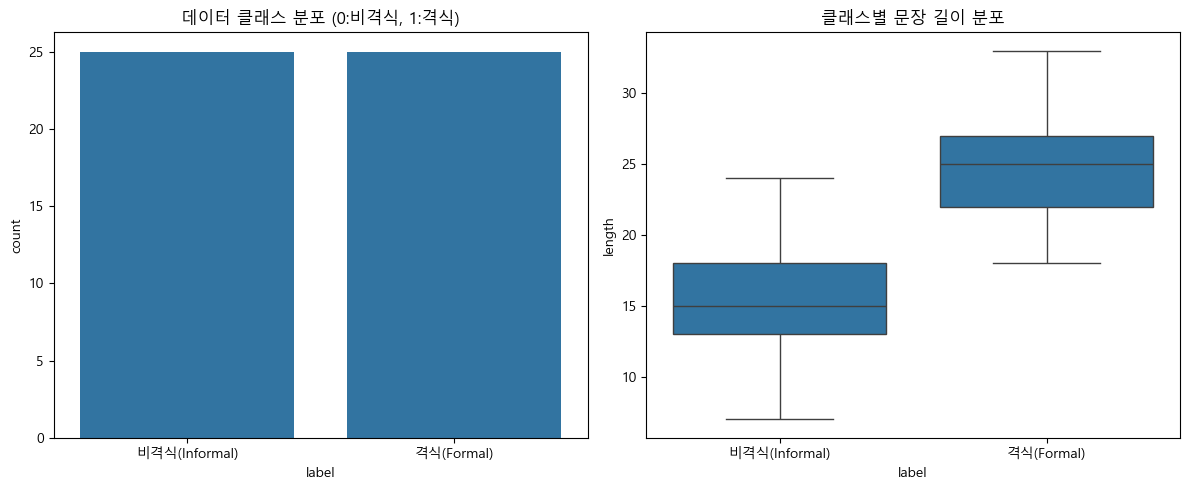

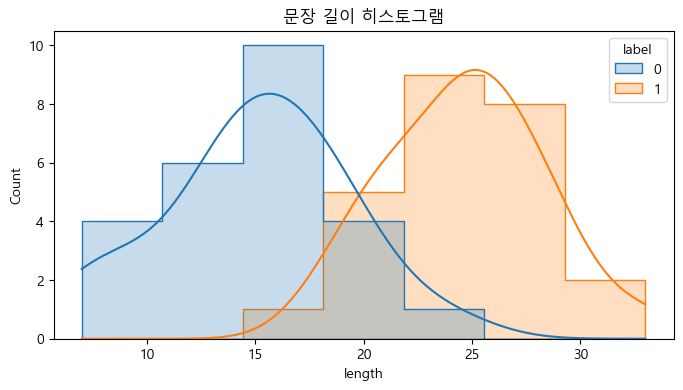

In [10]:
# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 1. 클래스 비율 시각화 (Count Plot)
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df)
plt.title('데이터 클래스 분포 (0:비격식, 1:격식)')
plt.xticks([0, 1], ['비격식(Informal)', '격식(Formal)'])

# 2. 클래스별 문장 길이 분포 (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='length', data=df)
plt.title('클래스별 문장 길이 분포')
plt.xticks([0, 1], ['비격식(Informal)', '격식(Formal)'])

plt.tight_layout()
plt.show()

# 추가 시각화: 길이 히스토그램
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='length', hue='label', kde=True, element="step")
plt.title("문장 길이 히스토그램")
plt.show()

## 📊 데이터 분석 및 발견 사항 (Insights)

### 1. 데이터 개요
- 총 데이터 수: 20개 (예시)
- 클래스 비율: 비격식(0)과 격식(1)이 1:1 비율로 균형을 이루고 있음.

### 2. 주요 관찰 내용 (EDA 결과)
1. **문장의 길이 차이**:
    - `boxplot`과 `describe()` 결과를 볼 때, **격식(Formal)** 문장이 비격식 문장보다 평균적으로 길이가 **더 긴 경향**이 있음.
    - 비격식 문장은 "ㅇㅇ", "ㅋㅋㅋ" 등 매우 짧은 단답형이 많음.
    - 격식 문장은 서술어(~습니다, ~합니다)가 포함되어 길이가 길어짐.
    
2. **어휘적 특성**:
    - 비격식: 초성체(ㅋㅋㅋ), 은어(개웃기네), 반말 등이 주를 이룸.
    - 격식: 존댓말(~요, ~니다), 직함(교수님), 공적인 단어(문의, 제출)가 자주 등장함.

### 3. 향후 모델링 계획 (Assignment 5)
- 문장의 길이뿐만 아니라, 특정 단어(TF-IDF)의 등장이 중요한 Feature가 될 것으로 예상됨.
- 데이터 수가 적으므로 Naive Bayes 모델이 적합할 것으로 보임.
- 실제 학습 시에는 더 많은 데이터를 수집하여(카카오톡 내보내기 등) 일반화 성능을 높여야 함.